In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.backends.cudnn.enabled

True

In [16]:
path = untar_data(URLs.FLOWERS);
path

PosixPath('/home/jupyter/.fastai/data/oxford-102-flowers')

In [17]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-102-flowers/test.txt'),
 PosixPath('/home/jupyter/.fastai/data/oxford-102-flowers/jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-102-flowers/train.txt'),
 PosixPath('/home/jupyter/.fastai/data/oxford-102-flowers/valid.txt')]

In [18]:
path_img = path/'jpg'

In [19]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/jupyter/.fastai/data/oxford-102-flowers/jpg/image_06159.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-102-flowers/jpg/image_06566.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-102-flowers/jpg/image_02325.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-102-flowers/jpg/image_02678.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-102-flowers/jpg/image_01279.jpg')]

In [20]:
df = pd.read_csv('/home/jupyter/.fastai/data/oxford-102-flowers/train.txt', 
                 names=['name','label'], delim_whitespace=True)
df.head()

,name,label
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


In [21]:
df.shape

(1020, 2)

In [22]:
bs=64
tfms = get_transforms()
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=224, bs=bs).normalize(imagenet_stats)

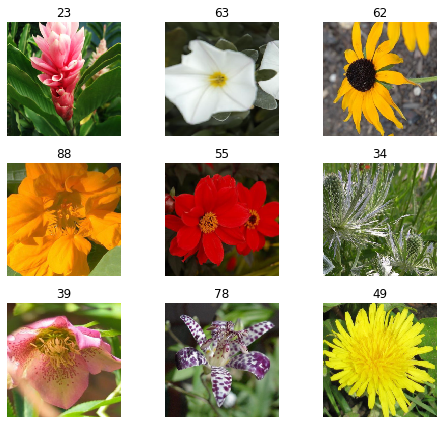

In [23]:
data.show_batch(rows=3, figsize=(7,6))

In [24]:
len(data.classes)

102

In [25]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [26]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,5.552177,3.128646,0.323529,00:13
1,3.434803,1.412464,0.632353,00:13
2,2.255953,1.100796,0.686275,00:13
3,1.589809,0.970057,0.725490,00:13
4,1.168043,0.920507,0.720588,00:13
5,0.886027,0.906385,0.740196,00:13


In [27]:
learn.save('resnet50-stage-01')

In [28]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.175884,0.834920,0.764706,00:13
1,0.148827,0.788953,0.794118,00:13
2,0.128845,0.770926,0.769608,00:13
3,0.119582,0.774143,0.779412,00:13


In [29]:
learn.save('resnet50-stage-02')

In [30]:
#learn.load('resnet50-stage-01')
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


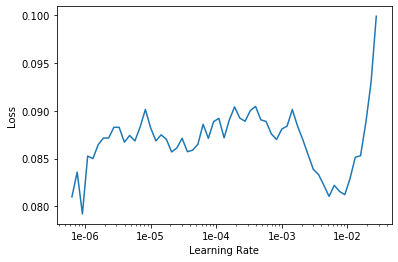

In [31]:
learn.recorder.plot()

In [32]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-35,1e-25))

epoch,train_loss,valid_loss,accuracy,time
0,0.090602,0.768221,0.789216,00:17
1,0.083834,0.766577,0.779412,00:15
